In [4]:
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv('/Users/artemmoskvin/Documents/Data-Science/Data/wine_cleared.csv')
data.nunique()

Unnamed: 0               129971
country                      43
description              119955
designation               37980
points                       21
price                       391
province                    425
region_1                   1230
taster_name                  20
taster_twitter_handle        16
title                    118840
variety                     707
winery                    16757
dtype: int64

In [6]:
print(data['price'].max())

3300.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


In [8]:
dupl_columns = list(data.columns)
mask = data.duplicated(subset=dupl_columns)
data_duplicates = data[mask]
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')
data_dedupped = data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {data_dedupped.shape[0]}')

Число найденных дубликатов: 0
Результирующее число записей: 129971


<AxesSubplot:>

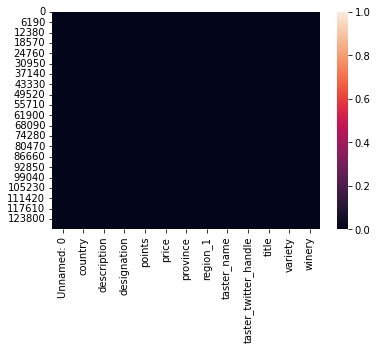

In [9]:
sns.heatmap(data.isnull()) # наглядная карта пропусков

In [10]:
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

country     0.048472
province    0.048472
variety     0.000769
dtype: float64

In [11]:
drop_data = data.copy()
thresh = drop_data.shape[0]*0.6
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)

<AxesSubplot:>

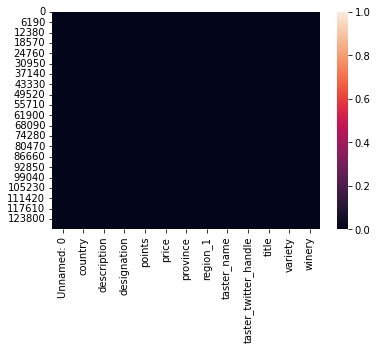

In [12]:
sns.heatmap(drop_data.isnull()) # смотрим, какие признаки остались

In [13]:
drop_data.describe(include='all')

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
count,129971.000000,129908,129971,129971,129971.000000,129971.000000,129908,129971,129971,129971,129971,129970,129971
unique,NaN,43,119955,37980,NaN,NaN,425,1230,20,16,118840,707,16757
top,NaN,US,"Seductively tart in lemon pith, cranberry and ...",unknown,NaN,NaN,California,unknown,unknown,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,NaN,54504,3,37465,NaN,NaN,36247,21247,26244,31213,11,13272,222
mean,64985.000000,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,37519.540256,NaN,NaN,NaN,3.039730,39.577066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32492.500000,NaN,NaN,NaN,86.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,64985.000000,NaN,NaN,NaN,88.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,97477.500000,NaN,NaN,NaN,91.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
drop_data['designation'] = drop_data['designation'].fillna('unknown')
drop_data['region_1'] = drop_data['region_1'].fillna('unknown')
drop_data['taster_name'] = drop_data['taster_name'].fillna('unknown')
drop_data['taster_twitter_handle'] = drop_data['taster_twitter_handle'].fillna('unknown')
drop_data['country'] = drop_data['country'].fillna('US')
drop_data['price'] = drop_data['price'].fillna(drop_data['price'].mean())
drop_data['province'] = drop_data['province'].fillna('California')
drop_data['variety'] = drop_data['variety'].fillna('Pinot Noir')

In [15]:
drop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129971 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


<AxesSubplot:>

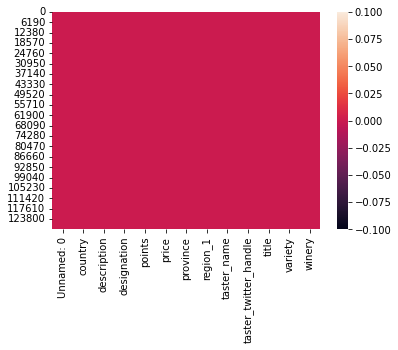

In [16]:
sns.heatmap(drop_data.isnull()) # убеждаемся, что датасет без пропусков